# <center>Unravel Spirals<center>

- First part of the "Skeletonize section" allows you to just run one image at a time to see the output and play around with the thresholding, blurring, and dilation/erosion parameters.
- The second part combines those cells into one in a for loop that you can run to skeletonize all images in a folder

--------
Process to unravel spirals:
 - Take image as input, and skeletonize
 - Clean up the skeleton (no gaps or branches)
 - Unravel the skeleton 
    - Account for cross over

**10/28/22 - as of now, this file only skeletonizes the images**

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from skimage.morphology import skeletonize, thin
from scipy import ndimage

c:\Users\Rebecca\anaconda3\envs\MLEnv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <center> Step 1: Skeletonize<center>

In [538]:
# load image
dir = os.getcwd()
imgPath = dir + '/spiral-classifier/datasets/folador_skeletonize/V55HE05.png'
img = cv2.imread(imgPath, 1)
img = cv2.resize(img, (1000, 1000))

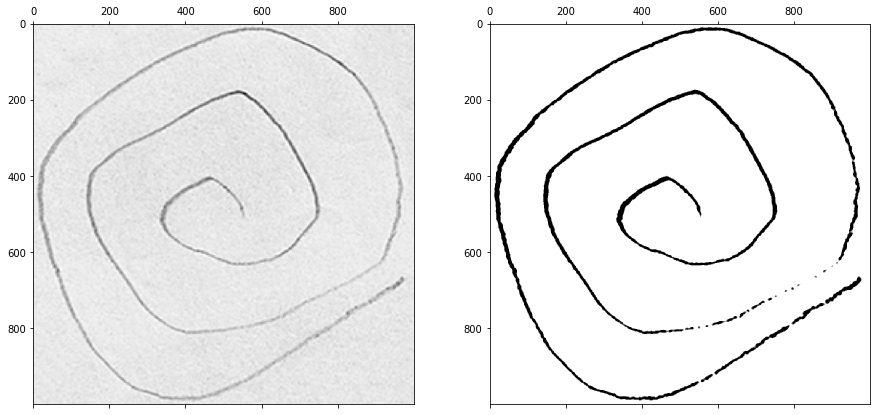

In [544]:
# ----- CONVERT TO BINARY IMAGE -----
# convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_gray = cv2.blur(img_gray, (7, 7))
# img_gray = cv2.medianBlur(img_gray, 9)

nx = np.shape(img_gray)[0]
ny = np.shape(img_gray)[1]

# use otsu's method to binarize
_, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
# thresh = np.mean(img_gray)
# error = 255 - thresh
# thresh = thresh - error

# # binarize the image
# _, img_bin = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)

img_bin_blurred = ndimage.median_filter(img_bin, size=4)
# img_bin_blurred = cv2.blur(img_bin, (3,3))
# img_bin_blurred = cv2.medianBlur(img_bin_blurred, 5)


fig, ax = plt.subplots(1,2,figsize=(15,20))
ax[0].matshow(img_gray, cmap='gray')
ax[1].matshow(img_bin_blurred, cmap='gray')

True

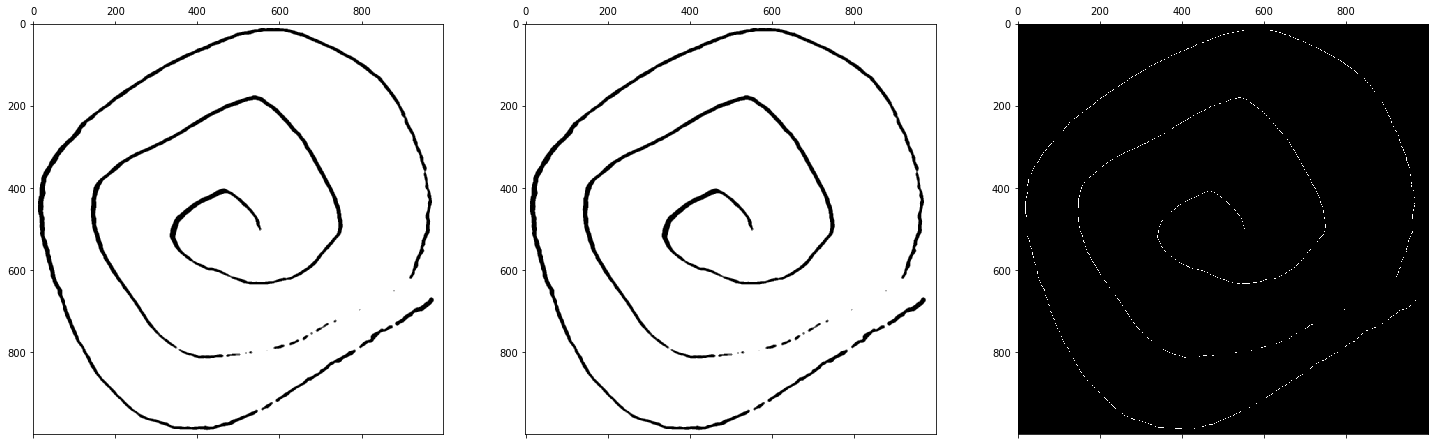

In [540]:
# ----- THIN TO ONE-PIXEL WIDTH -----
# dilate
size1 = 1
size2 = 4
element1 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*size1+1,2*size1+1), anchor=(size1,size1))
element2 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*size2+1,2*size2+1), anchor=(size2,size2))

# img_morph = cv2.dilate(img_bin_blurred, element1)
# img_morph = cv2.blur(img_bin_blurred, (5,5))
# img_morph = cv2.medianBlur(img_morph, 7)

# _, img_bin_blurred = cv2.threshold(img_morph, 0, 255, cv2.THRESH_BINARY)
img_morph = img_bin_blurred
# for y in range(ny):
#     for x in range(nx):
#         if img_morph[x][y] != 255:
#             img_morph[x][y] = 0

# img_morph = cv2.dilate(img_morph, element2)
# img_morph = cv2.dilate(img_morph, element2)



# img_morph = cv2.blur(img_morph, (5,5))
# img_morph = cv2.medianBlur(img_morph, 11)

img_bin_norm = img_morph / 255
img_bin_norm = 1 - img_bin_norm
thinned = thin(img_bin_norm, max_num_iter=250) * 255


fig, ax = plt.subplots(1,3,figsize=(25,30))
ax[0].matshow(img_bin_blurred, cmap='gray')
ax[1].matshow(img_morph, cmap='gray')
ax[2].matshow(thinned, cmap='gray')

# cv2.imwrite('thinned.jpg', thinned) # save image


### <center>Skeletonize all images in folder<center>

This next code cell combines the code above into a for loop to skeletonize all images in a folder

In [ ]:

dir = os.getcwd()
folderPath = dir + '/spiral-classifier/datasets/folador_skeletonize/'

for i in os.listdir(folderPath):
    # load image
    img_path = folderPath + i
    img = cv2.imread(img_path, 1)
    img = cv2.resize(img, (1000, 1000))

    # convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    nx = np.shape(img_gray)[0]
    ny = np.shape(img_gray)[1]

    # use otsu's method to binarize
    _, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

    img_bin_blurred = ndimage.median_filter(img_bin, size=8)
    img_bin_blurred = cv2.blur(img_bin_blurred, (5,5))
    img_bin_blurred = cv2.medianBlur(img_bin_blurred, 11)


    # thin to one-pixel width
    size1 = 1
    size2 = 4
    element1 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*size1+1,2*size1+1), anchor=(size1,size1))
    element2 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*size2+1,2*size2+1), anchor=(size2,size2))

    img_morph = img_bin_blurred
    for y in range(ny):
        for x in range(nx):
            if img_morph[x][y] != 255:
                img_morph[x][y] = 0

    img_bin_norm = img_morph / 255
    img_bin_norm = 1 - img_bin_norm
    thinned = thin(img_bin_norm, max_num_iter=200) * 255

    ## UNCOMMENT TO SAVE IMAGES
    # saveImg = cv2.resize(thinned, (256,256))
    # savename = folderPath + 'skel_' + i
    # cv2.imwrite(savename , thinned)


# <center> -- **ARCHIVED CODE** -- <center>

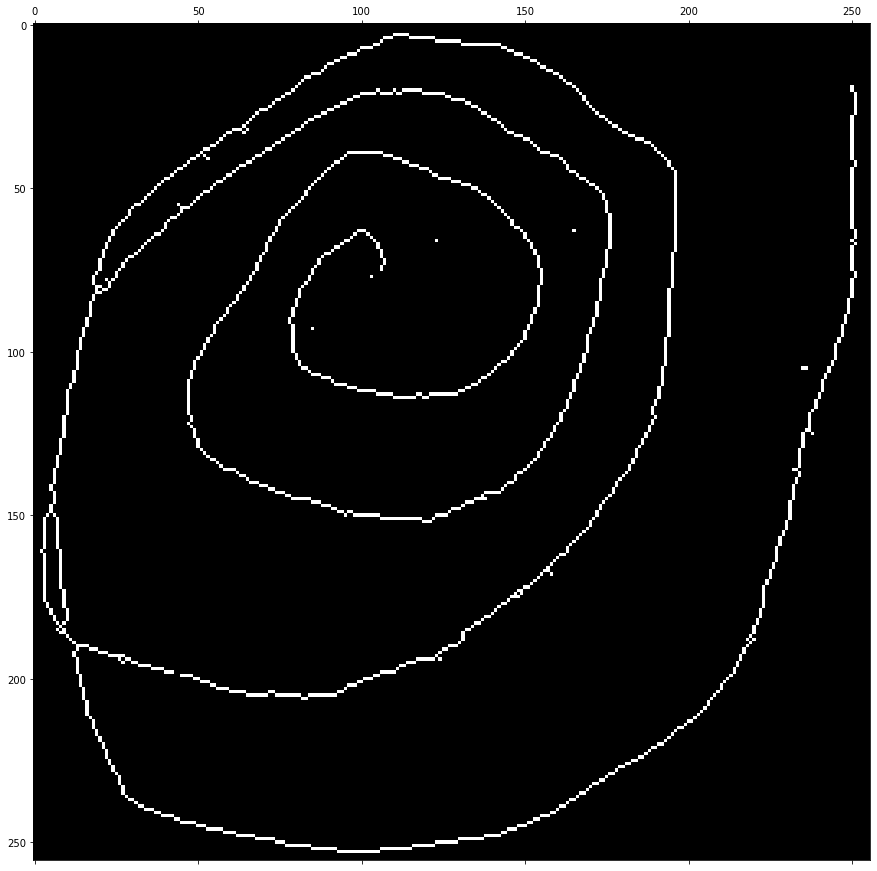

In [91]:
# ----- SKELETONIZE IMAGE -----

img_gray =  np.squeeze(img_gray)
thresh = np.mean(img_gray)
error = 255 - thresh
thresh = thresh - error

# binarize the image
_, img_bin = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_OTSU)
img_bin_norm = img_bin / 255
img_bin_norm = 1 - img_bin_norm

# remove salt-pepper pixels
nx = np.shape(img_gray)[0]
ny = np.shape(img_gray)[1]
bn
# for y in range(1,ny-1):
#     for x in range(1,nx-1):
#         if img_bin_norm[x][y] == 1:
#             pos1 = img_bin_norm[x-1][y-1]; pos2 = img_bin_norm[x-1][y]; pos3 = img_bin_norm[x-1][y+1]
#             pos4 = img_bin_norm[x][y-1];   pos6 = img_bin_norm[x][y+1]
#             pos7 = img_bin_norm[x+1][y-1]; pos8 = img_bin_norm[x+1][y]; pos9 = img_bin_norm[x+1][y+1]
#             if  (pos1 == 1) & np.any([pos2, pos3, pos4, pos6, pos7, pos8, pos9]):
#                 img_bin_norm[x][y] = 0
#                 img_bin_norm[x-1][y-1] = 0

# plt.figure(figsize=(10,10))
# plt.matshow(img_bin_norm, cmap='gray', fignum=1)

# skeleton = skeletonize(img_bin_norm) * 255
thinned = thin(img_bin_norm, max_num_iter=200) * 255
# plt.figure(figsize=(10,10))
# plt.matshow(thinned, cmap='gray', fignum=1)

# apply median filter
# thinned = ndimage.median_filter(thinned, size=2)

# for y in range(1,ny-1):
#     for x in range(1,nx-1):
#         if thinned[x][y] == 255:
#             if (x == 86) & (y == 103):
#                 print('pause')

#             if (thinned[x-1][y-1]==0) & (thinned[x-1][y]==0) & (thinned[x-1][y+1]==0) & \
#             (thinned[x][y-1]==0) & (thinned[x][y+1]==0) & \
#             (thinned[x+1][y-1]==0) & (thinned[x+1][y]==0) & (thinned[x+1][y+1]==0):
#                 thinned[x][y] = 0

plt.figure(figsize=(15,15))
plt.matshow(thinned, cmap='gray', fignum=1)


<Figure size 720x720 with 0 Axes>

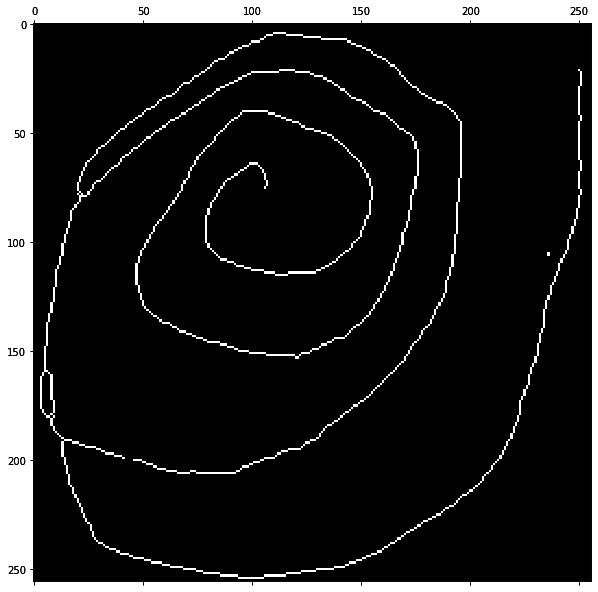

In [90]:
# perform gaussian blurring, then thin again
blur = cv2.blur(thinned, (3,3))
plt.figure(figsize=(10,10))
plt.matshow(blur, fignum=1)
thinned = thin(blur, max_num_iter=200) * 255
plt.figure(figsize=(10,10))
plt.matshow(thinned, cmap='gray', fignum=1)